In [1]:
from pathlib import Path

from matplotlib import rcParams
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyprojroot
import seaborn as sns

import searchnets

In [2]:
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

paths

In [3]:
SOURCE_DATA_ROOT = pyprojroot.here('results/VSD/source_data/')

FIGURES_ROOT = pyprojroot.here('docs/paper/figures/experiment-2')

constants

In [4]:
NET_NAMES = [
    'alexnet',
    'VGG16',
    'CORnet_Z',
    'CORnet_S',
]

TARGET_CLASS = [
    'person',
    'cat',
    'dog',
    'chair',
    'car',
]

SET_SIZES = list(range(1, 6))

## load / tidy source data

In [5]:
df_all = pd.read_csv(
    SOURCE_DATA_ROOT / 'VSD-searchstims-all.csv'
)

In [6]:
NET_NAMES_FOR_DISPLAY = {
    'VGG16': 'VGG16',
    'alexnet': 'AlexNet',
    'CORnet_S': 'CORnet S',
    'CORnet_Z': 'CORnet Z',
}

df_all.net_name = df_all.net_name.map(NET_NAMES_FOR_DISPLAY)

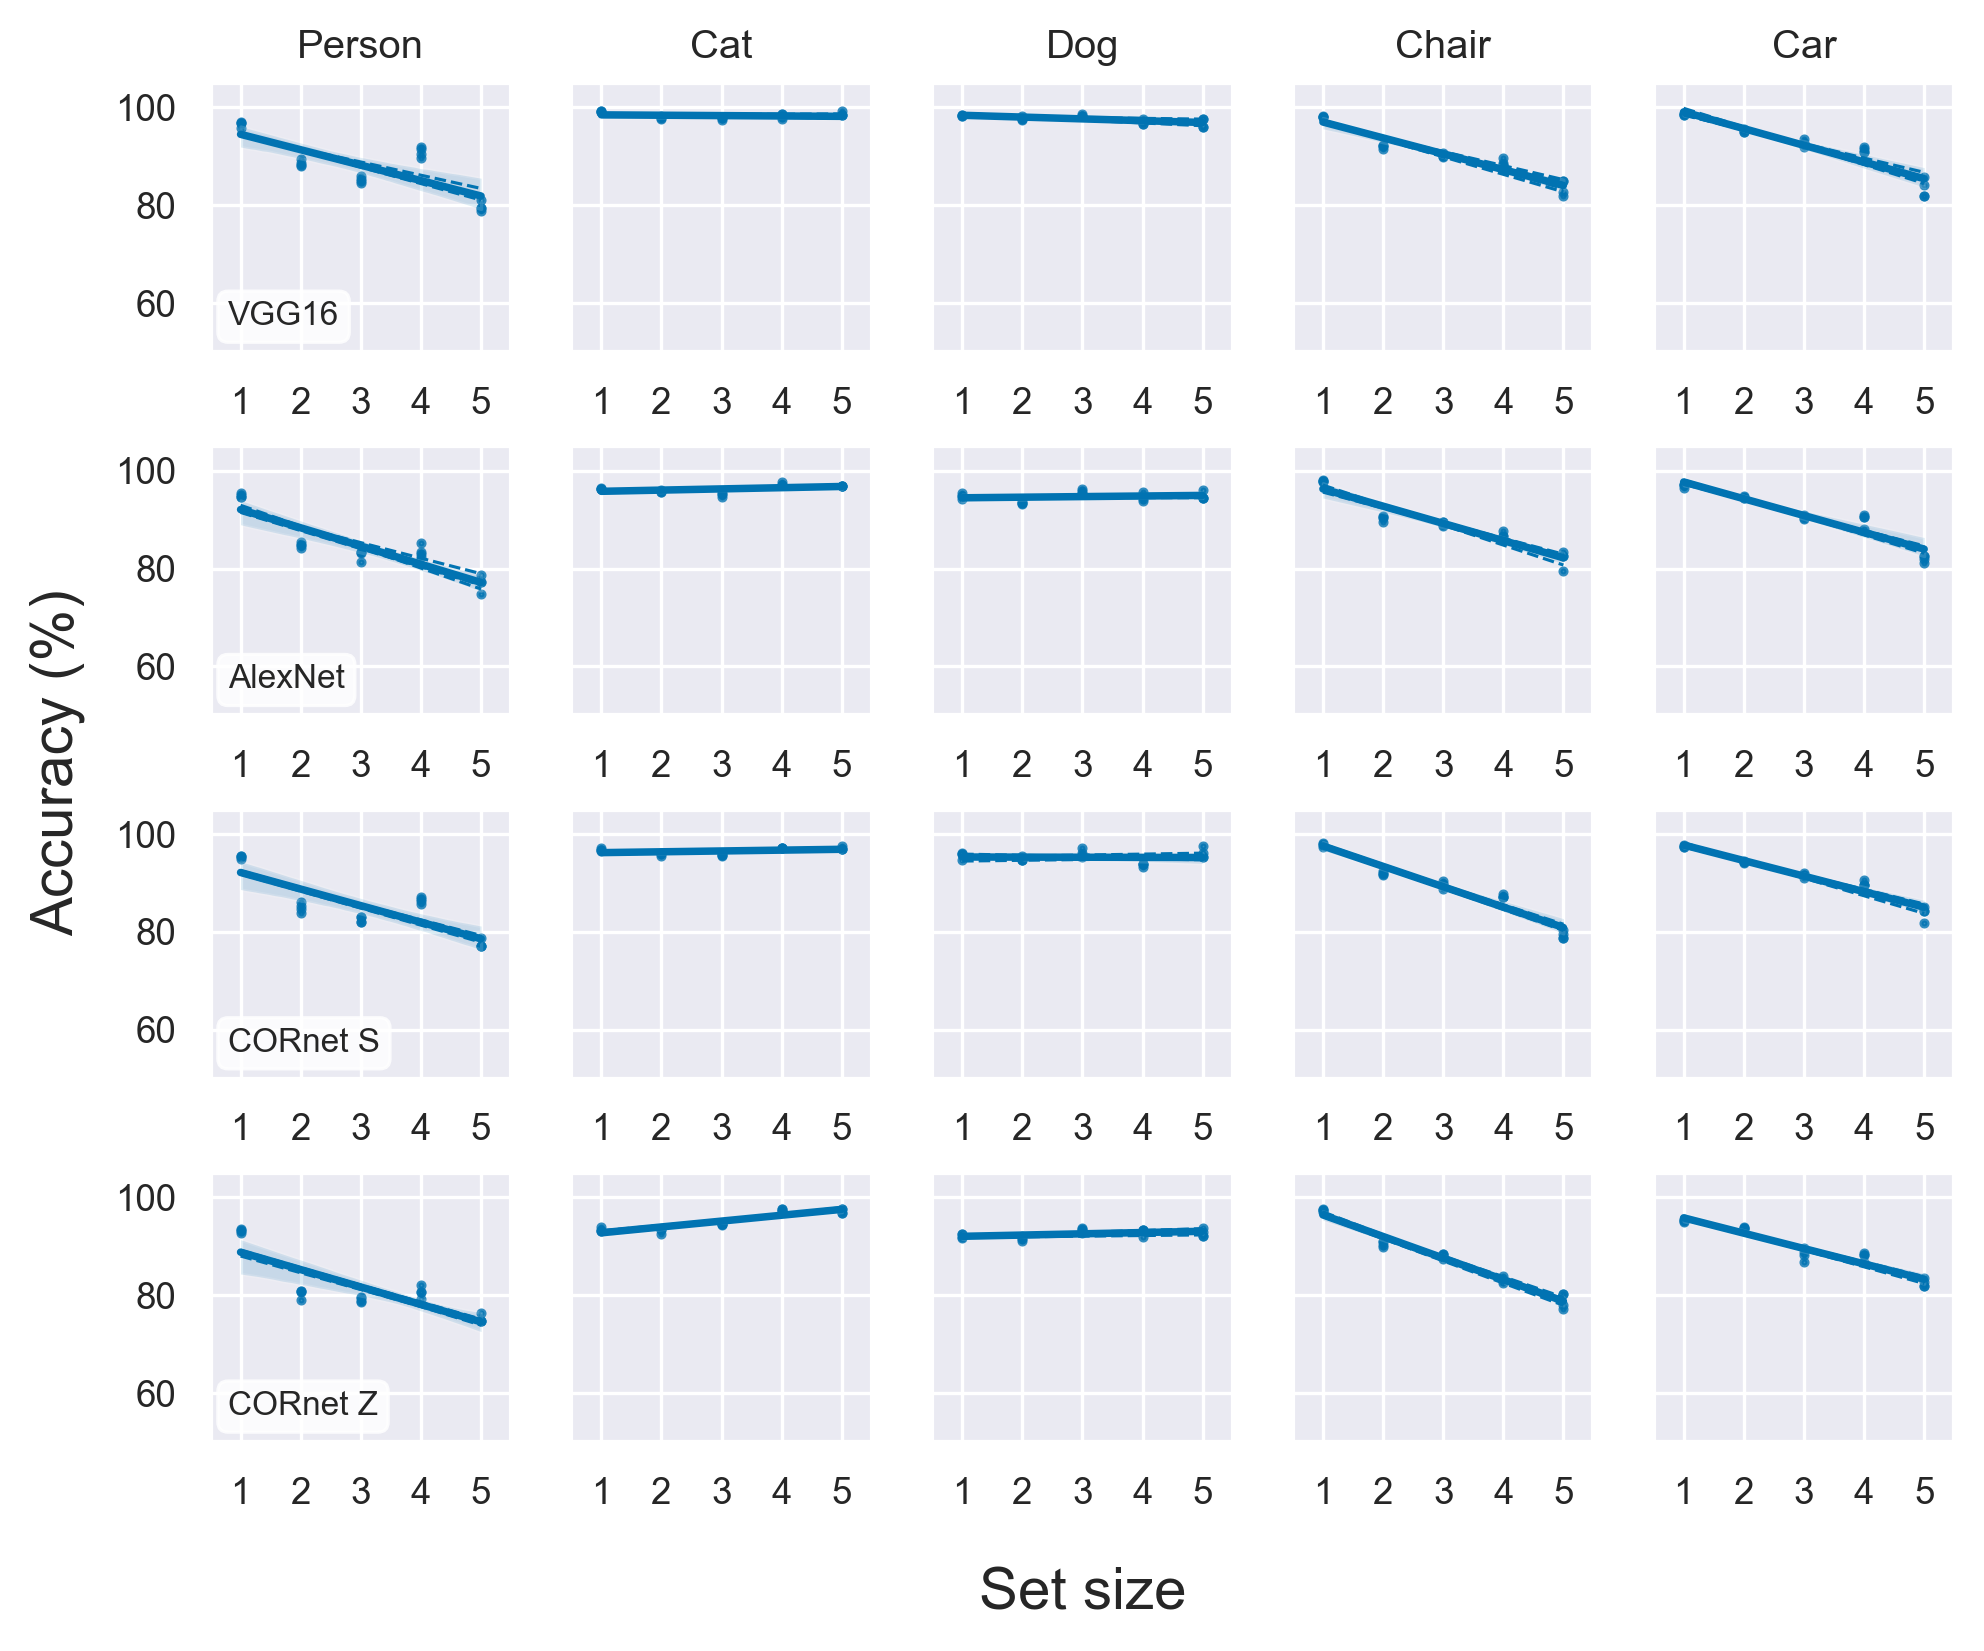

In [7]:
sns.set_context('paper')
sns.set_style('darkgrid')
sns.set_palette('colorblind')

# FIGSIZE = tuple(cm_to_inches(size) for size in (7.5, 10))
FIGSIZE = (7.5, 6)
DPI = 300

FIG_ROWS = df_all.net_name.unique()
FIG_COLUMNS = TARGET_CLASS

n_rows = len(FIG_ROWS)
n_cols = len(FIG_COLUMNS)
fig, ax_arr = plt.subplots(n_rows, n_cols, sharey=True, figsize=FIGSIZE, dpi=DPI)
fig.subplots_adjust(hspace=0.35)

row_axes = []
for row in range(n_rows):
    row_ax = fig.add_subplot(n_rows, 1, row + 1)
    row_ax.set_xticks([])
    row_ax.set_yticks([])
    row_ax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    row_ax.grid(False)
    row_ax.patch.set_facecolor('none')
    row_axes.append(row_ax)

TEXTBOX_PROPS = dict(boxstyle='round', facecolor='white', alpha=0.85)
    

line_color = sns.color_palette()[0]

add_legend = False

for row, net_name in enumerate(NET_NAMES_FOR_DISPLAY.values()):
    df_this_net = df_all[df_all['net_name'] == net_name]

    for col, stim_name in enumerate(FIG_COLUMNS):

        data = df_this_net[df_this_net.stimulus == stim_name]

        ax = ax_arr[row, col]
        ax.set_axisbelow(True)  # so grid is behind
        
        sns.regplot(
            data=data,
            x='set_size',
            y='accuracy',
            x_ci='sd',
            ax=ax,
            scatter=True,
            scatter_kws={'s': 2}
        )

        for net_number in data.net_number.unique():
            data_net = data[data.net_number == net_number]
            sns.regplot(
                data=data_net,
                x='set_size',
                y='accuracy',
                ci=None,
                scatter=False,
                ax=ax,
                line_kws={'linewidth': 0.75, 'linestyle': 'dashed', 'color': line_color}
            )
        
        ax.set_xticks(SET_SIZES)
        ax.set_xticklabels(SET_SIZES)
        for ticklabel in ax.xaxis.get_ticklabels():
            pos0 = ticklabel.get_position()[0]
            if pos0 not in SET_SIZES:
                ticklabel.set_visible(False)
        ax.set_xlim([0.5, 5.5])
        ax.set_ylim([50, 105])
        ax.set_yticks([60, 80, 100])
        ax.set_ylabel('')
        ax.set_xlabel('')

        if row == 0:
            title = stim_name.title()
            ax.set_title(title)
        if col == 0:
            row_axes[row].text(0.01, 0.1, net_name, fontsize=8, bbox=TEXTBOX_PROPS)

# add a big axis, hide frame
big_ax = fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
big_ax.set_xticks([])
big_ax.set_yticks([])
big_ax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
big_ax.grid(False)

big_ax.set_xlabel("Set size", labelpad=30, fontsize=14);
big_ax.set_ylabel('Accuracy (%)', labelpad=30, fontsize=14);

for ext in ('svg', 'png'):
    fig_path = FIGURES_ROOT.joinpath(
        f'VSD-searchstims-acc-v-set-size.{ext}'
    )
    plt.savefig(fig_path, bbox_inches="tight")